In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# load the dataset
california = fetch_california_housing()

# convert to pandas dataframe
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['price'] = california.target

# check the first 5 rows
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# fitting the linear regression model
X = california_df.drop('price', axis=1)
y = california_df['price']

# import linear regression model
from sklearn.linear_model import LinearRegression

# instantiate the model
lr_multiple = LinearRegression()

# fit the model
lr_multiple.fit(X, y)

# print the coefficients
coeff_lr = lr_multiple.coef_

# create the linear regression equation
print('y = {:.2f} + {:.2f}*MedInc + {:.2f}*HouseAge + {:.2f}*AveRooms + {:.2f}*AveBedrms + \
{:.2f}*Population + {:.2f}*AveOccup + {:.2f}*Latitude + {:.2f}*Longitude'.format(lr_multiple.intercept_, \
coeff_lr[0], coeff_lr[1], coeff_lr[2], coeff_lr[3], coeff_lr[4], coeff_lr[5], coeff_lr[6], coeff_lr[7]))

y = -36.94 + 0.44*MedInc + 0.01*HouseAge + -0.11*AveRooms + 0.65*AveBedrms + -0.00*Population + -0.00*AveOccup + -0.42*Latitude + -0.43*Longitude


In [9]:
# fit a ridge regression model
from sklearn.linear_model import Ridge

# instantiate the model
ridge = Ridge(alpha=0.2)

# fit the model
ridge.fit(X, y)

# print the coefficients
coeff_ridge = ridge.coef_

# create the ridge regression equation
print('y = {:.2f} + {:.2f}*MedInc + {:.2f}*HouseAge + {:.2f}*AveRooms + {:.2f}*AveBedrms + \
{:.2f}*Population + {:.2f}*AveOccup + {:.2f}*Latitude + {:.2f}*Longitude'.format(ridge.intercept_, \
coeff_ridge[0], coeff_ridge[1], coeff_ridge[2], coeff_ridge[3], coeff_ridge[4], coeff_ridge[5], coeff_ridge[6], coeff_ridge[7]))

y = -36.94 + 0.44*MedInc + 0.01*HouseAge + -0.11*AveRooms + 0.64*AveBedrms + -0.00*Population + -0.00*AveOccup + -0.42*Latitude + -0.43*Longitude


In [10]:
# compare the score of linear regression and ridge regression
print('Linear Regression score: {:.2f}'.format(lr_multiple.score(X, y)))
print('Ridge Regression score: {:.2f}'.format(ridge.score(X, y)))

Linear Regression score: 0.61
Ridge Regression score: 0.61


In [12]:
# lasso regression
from sklearn.linear_model import Lasso

# instantiate the model
lasso = Lasso(alpha=0.2)

# fit the model
lasso.fit(X, y)

# print the coefficients
coeff_lasso = lasso.coef_

# create the lasso regression equation
print('y = {:.2f} + {:.2f}*MedInc + {:.2f}*HouseAge + {:.2f}*AveRooms + {:.2f}*AveBedrms + \
{:.2f}*Population + {:.2f}*AveOccup + {:.2f}*Latitude + {:.2f}*Longitude'.format(lasso.intercept_, \
coeff_lasso[0], coeff_lasso[1], coeff_lasso[2], coeff_lasso[3], coeff_lasso[4], coeff_lasso[5], coeff_lasso[6], coeff_lasso[7]))

print('y = {:.2f} + {:.2f}*MedInc + {:.2f}*HouseAge + {:.2f}*AveRooms + {:.2f}*AveBedrms + \
{:.2f}*Population + {:.2f}*AveOccup + {:.2f}*Latitude + {:.2f}*Longitude'.format(ridge.intercept_, \
coeff_ridge[0], coeff_ridge[1], coeff_ridge[2], coeff_ridge[3], coeff_ridge[4], coeff_ridge[5], coeff_ridge[6], coeff_ridge[7]))

y = 0.39 + 0.37*MedInc + 0.02*HouseAge + -0.00*AveRooms + 0.00*AveBedrms + 0.00*Population + -0.00*AveOccup + -0.01*Latitude + -0.00*Longitude
y = -36.94 + 0.44*MedInc + 0.01*HouseAge + -0.11*AveRooms + 0.64*AveBedrms + -0.00*Population + -0.00*AveOccup + -0.42*Latitude + -0.43*Longitude


In [13]:
# compare the score of linear regression and ridge regression and lasso regression
print('Linear Regression score: {:.2f}'.format(lr_multiple.score(X, y)))
print('Ridge Regression score: {:.2f}'.format(ridge.score(X, y)))
print('Lasso Regression score: {:.2f}'.format(lasso.score(X, y)))

Linear Regression score: 0.61
Ridge Regression score: 0.61
Lasso Regression score: 0.50


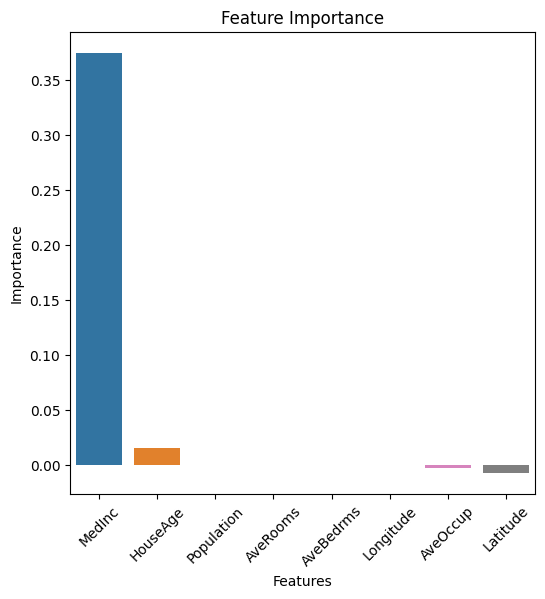

In [15]:
# get most important features 
feature_importance = pd.DataFrame({'feature': california.feature_names, 'importance': coeff_lasso})

# sort the values
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

# plot the feature importance
plt.figure(figsize=(6, 6))
sns.barplot(x='feature', y='importance', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

- Linear Regression 
- Ridge Regression where the coefficients are regularized with L2-norm
- Lasso Regression where the coefficients are regularized with L1-norm

In [16]:
# create a function to fit and score a chosen model (Linear Regression, Ridge Regression, Lasso Regression)

def fit_and_score_model(X, y):
    '''
    Fits and scores a given model.
    model: chosen model
    X: features
    y: target
    '''
    # import train_test_split
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression, Ridge, Lasso

    # choose the model (get user input)
    model = input('Choose a model (lr, ridge, lasso): ')

    # instantiate the model
    if model == 'lr':
        model = LinearRegression()
    elif model == 'ridge':
        model = Ridge()
    elif model == 'lasso':
        model = Lasso()
    else:
        print('Invalid model. Choose a model from lr, ridge, lasso.')
    
    # split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # fit the model
    model.fit(X_train, y_train)
    
    # print the score
    print('Score: {:.2f}'.format(model.score(X_test, y_test)))
    
    # print the coefficients
    print('Coefficients: {}'.format(model.coef_))
    
    # print the intercept
    print('Intercept: {:.2f}'.format(model.intercept_))

In [19]:
fit_and_score_model(X, y)

Score: 0.29
Coefficients: [ 1.41387282e-01  6.02770992e-03  0.00000000e+00 -0.00000000e+00
 -2.18616364e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
Intercept: 1.35
